In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
%matplotlib notebook

In [ ]:
pt_tweet=pd.read_csv("C:/Users/AsusPC/Desktop/Saint Peter's University Note/Capstone Project/Tweet/pt_tweet_final")
en_tweet=pd.read_csv("C:/Users/AsusPC/Desktop/Saint Peter's University Note/Capstone Project/Tweet/en_tweet_final")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pt_tweet.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [ ]:
pt_tweet.head()

,coordinate,id,screen_name,tweet,user_name,date,url,Latitude,Longitude
0,"{'type': 'Point', 'coordinates': [-8.4505545, ...",1086069620623065088,brunabernardo25,Tomorrow I regret not going to sleep earlier,brunabernardo25,2019-01-18 01:15:50+00:00,https://twitter.com/brunabernardo25/status/108...,37.092831,-8.248227
1,"{'type': 'Point', 'coordinates': [-8.544121, 3...",1082258427722764288,Dux_s,Say cool apps or games ... I have nothing to do,Dux_s,2019-01-07 12:51:31+00:00,https://twitter.com/Dux_s/status/1082258427722...,37.101162,-8.226561
2,"{'type': 'Point', 'coordinates': [-7.9614, 37....",1089193247254200322,SOTAwatch,16:07 CT7ASV / P () on CT / AL-002 (Serra do C...,SOTAwatch,2019-01-26 16:08:01+00:00,https://twitter.com/SOTAwatch/status/108919324...,37.176483,-8.201073
3,"{'type': 'Point', 'coordinates': [-7.9614, 37....",1089188509196402689,SOTAwatch,15:49 CT7ASV / P () on CT / AL-002 (Serra do C...,SOTAwatch,2019-01-26 15:49:11+00:00,https://twitter.com/SOTAwatch/status/108918850...,37.176483,-8.201073
4,NaN,1111766785466994688,aqnhnvpc,Yesterday we were worse than bad and today you...,aqnhnvpc,2019-03-29 23:07:11+00:00,https://twitter.com/aqnhnvpc/status/1111766785...,37.100838,-8.224778


In [ ]:
en_tweet.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
en_tweet.head()

,user_name,date,url,id,Latitude,Longitude,coordinate,tweet
0,davidaguas16,2019-03-29 19:50:59+00:00,https://twitter.com/davidaguas16/status/111171...,1111717407226322945,37.126476,-8.299664,NaN,Im getting so sick my mind is about to colapse
1,aqnhnvpc,2019-03-29 18:29:59+00:00,https://twitter.com/aqnhnvpc/status/1111697026...,1111697026041954304,37.126476,-8.299664,NaN,Sinto que fiz mal but Okay
2,JohnfrancisNST,2019-03-29 17:44:47+00:00,https://twitter.com/JohnfrancisNST/status/1111...,1111685647411134464,37.126476,-8.299664,NaN,Happy mothers Mum I love you 💦💦💦💦💦💦💦
3,catarinapj04,2019-03-29 17:18:14+00:00,https://twitter.com/catarinapj04/status/111167...,1111678967361257472,37.126476,-8.299664,NaN,I would give you the world
4,catarinapj04,2019-03-29 16:36:54+00:00,https://twitter.com/catarinapj04/status/111166...,1111668567592833027,37.126476,-8.299664,NaN,Hahahaha


In [ ]:
en_tweet['tweet'].iloc[:10]

0       Im getting so sick my mind is about to colapse
1                           Sinto que fiz mal but Okay
2                 Happy mothers Mum I love you 💦💦💦💦💦💦💦
3                           I would give you the world
4                                             Hahahaha
5    Ayy, I'm like, "Bitch, who is your mans?"  \nC...
6    Abroad and my Bloody phone has automatically d...
7                                   Freedom feels good
8                                         N aguento jr
9                               place:e68b57affea10f1d
Name: tweet, dtype: object

In [ ]:
def tweet_preprocess(text):
    clean=[]
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    
    #Convert @username to AT_USER
    text = re.sub('@[^\s]+','',text)
    
    # Remove tickers
    text = re.sub(r'\$\w*', '', text)
    
    a=text.lower().split()

    return " ".join(str(tweet) for tweet in a if tweet not in stopwords.words('english'))

In [ ]:
en_tweet['clean_tweet']=en_tweet['tweet'].apply(tweet_preprocess)

In [ ]:
pt_tweet['clean_tweet']=pt_tweet['tweet'].apply(tweet_preprocess)

In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
def polarity(tweet):
    return analyser.polarity_scores(tweet)['compound']

In [ ]:
analyser.polarity_scores(en_tweet['clean_tweet'].iloc[4])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
en_tweet['Polarity']=en_tweet['clean_tweet'].apply(polarity)
pt_tweet['Polarity']=pt_tweet['clean_tweet'].apply(polarity)

In [ ]:
def sentiment(polarity):
    if polarity >0:
        return 'Positive'
    elif polarity==0:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
en_tweet['sentiment']=en_tweet['Polarity'].apply(sentiment)
pt_tweet['sentiment']=pt_tweet['Polarity'].apply(sentiment)

In [ ]:
en_tweet.head()

,user_name,date,url,id,Latitude,Longitude,coordinate,tweet,clean_tweet,Polarity,sentiment,new_co_Lat,new_co_Long
0,davidaguas16,2019-03-29 19:50:59+00:00,https://twitter.com/davidaguas16/status/111171...,1111717407226322945,37.126476,-8.299664,NaN,Im getting so sick my mind is about to colapse,im getting sick mind colapse,-0.5106,Negative,NaN,NaN
1,aqnhnvpc,2019-03-29 18:29:59+00:00,https://twitter.com/aqnhnvpc/status/1111697026...,1111697026041954304,37.126476,-8.299664,NaN,Sinto que fiz mal but Okay,sinto que fiz mal okay,0.2263,Positive,NaN,NaN
2,JohnfrancisNST,2019-03-29 17:44:47+00:00,https://twitter.com/JohnfrancisNST/status/1111...,1111685647411134464,37.126476,-8.299664,NaN,Happy mothers Mum I love you 💦💦💦💦💦💦💦,happy mothers mum love 💦💦💦💦💦💦💦,0.8360,Positive,NaN,NaN
3,catarinapj04,2019-03-29 17:18:14+00:00,https://twitter.com/catarinapj04/status/111167...,1111678967361257472,37.126476,-8.299664,NaN,I would give you the world,would give world,0.0000,Neutral,NaN,NaN
4,catarinapj04,2019-03-29 16:36:54+00:00,https://twitter.com/catarinapj04/status/111166...,1111668567592833027,37.126476,-8.299664,NaN,Hahahaha,hahahaha,0.0000,Neutral,NaN,NaN


<IPython.core.display.Javascript object>


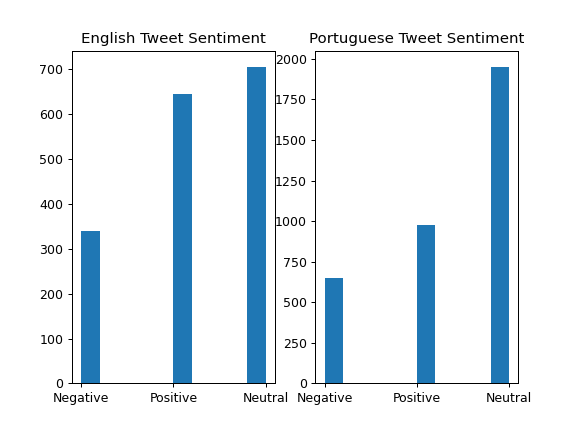

Text(0.5, 1.0, 'Portuguese Tweet Sentiment')

In [ ]:
fig,ax=plt.subplots(1,2)

ax[0].hist(en_tweet['sentiment'])
ax[0].set_title('English Tweet Sentiment')
ax[1].hist(pt_tweet['sentiment'])
ax[1].set_title('Portuguese Tweet Sentiment')

In [ ]:
en_tweet.head()

,user_name,date,url,id,Latitude,Longitude,coordinate,tweet,clean_tweet,Polarity,sentiment,new_co_Lat,new_co_Long
0,davidaguas16,2019-03-29 19:50:59+00:00,https://twitter.com/davidaguas16/status/111171...,1111717407226322945,37.126476,-8.299664,NaN,Im getting so sick my mind is about to colapse,im getting sick mind colapse,-0.5106,Negative,NaN,NaN
1,aqnhnvpc,2019-03-29 18:29:59+00:00,https://twitter.com/aqnhnvpc/status/1111697026...,1111697026041954304,37.126476,-8.299664,NaN,Sinto que fiz mal but Okay,sinto que fiz mal okay,0.2263,Positive,NaN,NaN
2,JohnfrancisNST,2019-03-29 17:44:47+00:00,https://twitter.com/JohnfrancisNST/status/1111...,1111685647411134464,37.126476,-8.299664,NaN,Happy mothers Mum I love you 💦💦💦💦💦💦💦,happy mothers mum love 💦💦💦💦💦💦💦,0.8360,Positive,NaN,NaN
3,catarinapj04,2019-03-29 17:18:14+00:00,https://twitter.com/catarinapj04/status/111167...,1111678967361257472,37.126476,-8.299664,NaN,I would give you the world,would give world,0.0000,Neutral,NaN,NaN
4,catarinapj04,2019-03-29 16:36:54+00:00,https://twitter.com/catarinapj04/status/111166...,1111668567592833027,37.126476,-8.299664,NaN,Hahahaha,hahahaha,0.0000,Neutral,NaN,NaN


In [ ]:
import ast
t=ast.literal_eval(a)
t['coordinates'][0]

-7.92987644

In [ ]:
en_tweet[en_tweet.coordinate.notnull()]['coordinate'].iloc[0]

"{'type': 'Point', 'coordinates': [-7.92987644, 37.01928627]}"

In [ ]:
def best_coordinate(df):
    for i,co in enumerate(df.coordinate.notnull()):
        if co:
            #turn string into json dictionary
            df['new_co_Lat'].iloc[i]=ast.literal_eval(df.coordinate.iloc[i])['coordinates'][1]
            df['new_co_Long'].iloc[i]=ast.literal_eval(df.coordinate.iloc[i])['coordinates'][0]
        else:
            df['new_co_Lat'].iloc[i]=df.Latitude.iloc[i]
            df['new_co_Long'].iloc[i]=df.Longitude.iloc[i]
    return df

In [ ]:
en_tweet=best_coordinate(en_tweet)

C:\Users\AsusPC\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
pt_tweet_geo=pt_tweet.copy()

In [ ]:
pt_tweet_geo.to_csv('pt_tweet.csv')

In [ ]:
pt_tweet_geo.head()

,clean_tweet,Polarity,sentiment,Latitude,Longitude
0,tomorrow regret going sleep earlier,-0.4215,Negative,37.092831,-8.248227
1,say cool apps games ... nothing,0.3182,Positive,37.101162,-8.226561
2,16:07 ct7asv / p () ct / al-002 (serra caldeir...,0.0000,Neutral,37.176483,-8.201073
3,15:49 ct7asv / p () ct / al-002 (serra caldeir...,0.0000,Neutral,37.176483,-8.201073
4,yesterday worse bad today call like nothing? u...,-0.6249,Negative,37.100838,-8.224778


In [ ]:
total_tweet_clean=pd.read_csv("/content/drive/MyDrive/Capstone Project/tweet_sub.csv",index_col=0)

In [ ]:
total_tweet_clean.head()

,Sub_Sectio,geometry,clean_tweet,Polarity,sentiment,Latitude,Longitude
9,Albufeira,POLYGON ((-8.247090110218485 37.09070771126304...,"fse tantos gajos lindos e cheirosos,o meu cora...",-0.2732,Negative,37.089073,-8.24788
9,Albufeira,POLYGON ((-8.247090110218485 37.09070771126304...,"good jeans rotten, tracksuits much cozy 🥶",-0.1027,Negative,37.089073,-8.24788
9,Albufeira,POLYGON ((-8.247090110218485 37.09070771126304...,"many beautiful fragrant dudes, heart can't tak...",0.8724,Positive,37.089073,-8.24788
9,Albufeira,POLYGON ((-8.247090110218485 37.09070771126304...,mt q want pool life day parties night n result...,0.1280,Positive,37.089073,-8.24788
9,Albufeira,POLYGON ((-8.247090110218485 37.09070771126304...,today meso day .... 20 bites 😩,-0.2732,Negative,37.089073,-8.24788


In [ ]:
import folium as fo
from folium import Circle
from folium.plugins import HeatMap

In [ ]:
dfg=total_tweet_clean.groupby(['geometry','Latitude','Longitude'],as_index=False)

score_df=dfg.mean().sort_values(by='Polarity',ascending=False)

In [ ]:
Albufeira = fo.Map(location=[37.08819,-8.2503], tiles='cartodbpositron', zoom_start=12)

In [ ]:
def sentiment_color(sentiment):
  if sentiment =='Positive':
    return 'green'
  elif sentiment =='Negative':
    return 'red'
  else:
    return 'yellow'

In [ ]:
for i in range(len(sub)):
  Circle(location=[total_tweet_clean.iloc[i].Latitude,total_tweet_clean.iloc[i].Longitude],
         radius=10,
         color=sentiment_color(total_tweet_clean.iloc[i].sentiment)).add_to(Albufeira)

Albufeira

In [ ]:
Albufeira_avg = fo.Map(location=[37.08819,-8.2503], tiles='cartodbpositron', zoom_start=12)

In [ ]:
score_df['sentiment']=score_df['Polarity'].apply(sentiment)

In [ ]:
score_df.tail()

,geometry,Latitude,Longitude,Polarity,sentiment
62,"POLYGON ((-8.262086813967082 37.0919484525237,...",37.091381,-8.262397,-0.073243,Negative
5,POLYGON ((-8.187797012211323 37.09351260839671...,37.092937,-8.189756,-0.085658,Negative
4,POLYGON ((-8.187572145770041 37.09354872486888...,37.093548,-8.187700,-0.104934,Negative
9,"POLYGON ((-8.202292888097912 37.1762222485269,...",37.176579,-8.202650,-0.235329,Negative
49,POLYGON ((-8.247299325169431 37.09263761917124...,37.092831,-8.248227,-0.421500,Negative


In [ ]:
for i in range(len(score_df)):
  Circle(location=[score_df.iloc[i].Latitude,score_df.iloc[i].Longitude],
         radius=10,
         color=sentiment_color(score_df.iloc[i].sentiment)).add_to(Albufeira_avg)

Albufeira_avg